In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
import time
%matplotlib inline

In [25]:
def convolve(arr, kernal):
    n = arr.shape[0]
    k = kernal.shape[0]

    o = int((n - k) + 1) 

    output = np.zeros((o, o))
    
    for j in range(o):
        for i in range(o):
            output[i, j] = (kernal * arr[i: i + k, j: j + k]).sum()
    
    return output

In [27]:
arr = np.random.randint(1, 10, size = (8, 8))
kernal = np.random.randint(1, 10, size = (3, 3))
output = convolve(arr, kernal)
print(output)

[[194. 318. 322. 193. 196. 279.]
 [179. 290. 269. 184. 208. 215.]
 [269. 324. 291. 258. 247. 268.]
 [263. 291. 281. 282. 285. 238.]
 [211. 267. 312. 320. 287. 228.]
 [223. 265. 325. 303. 180. 191.]]


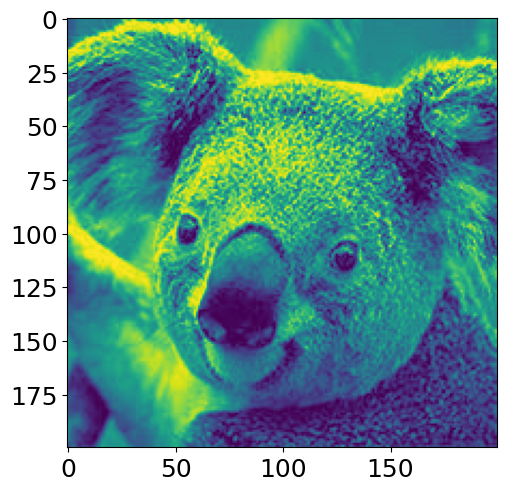

In [28]:
image = Image.open('image.jpeg')
image = image.resize((200, 200))
image_rgb = np.array(image.convert('RGB'))
image_g = image_rgb[:, :, 1]
# Image.fromarray(image_g).show()
imshow(image_g)

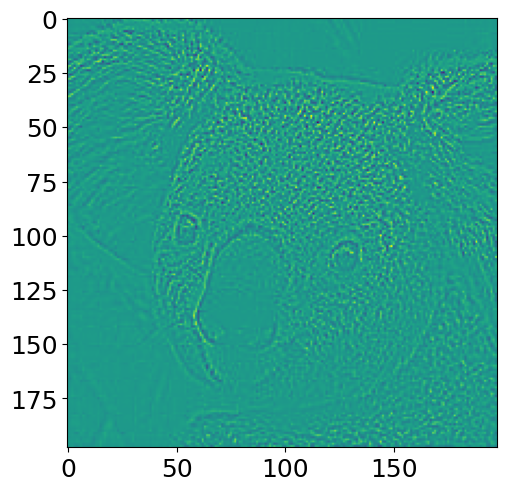

In [29]:
kernal1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
output1 = convolve(image_g, kernal1)
imshow(output1)

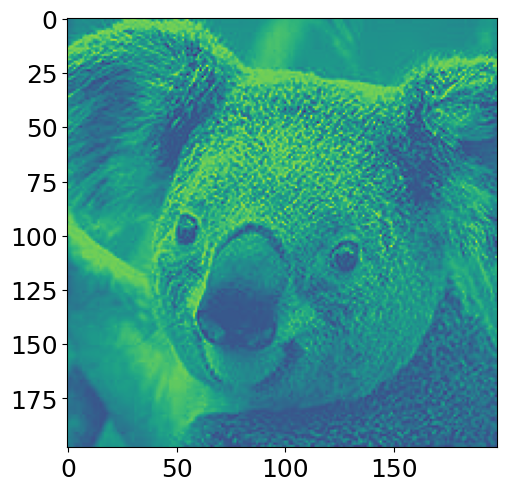

In [30]:
kernal1 = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]])
output1 = convolve(image_g, kernal1)
imshow(output1)

In [8]:
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(original_x_train, original_y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 


2022-11-16 22:32:49.135212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 37,146
Trainable params: 37,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
36/36 [==============================] - 6s 154ms/step - loss: 2.2372 - accuracy: 0.1796 - val_loss: 2.0083 - val_accuracy: 0.2500
Epoch 2/20
36/36 [==============================] - 5s 133ms/step - loss: 1.9799 - accuracy: 0.2965 - val_loss: 1.8632 - val_accuracy: 0.3400
Epoch 3/20
36/36 [==============================] - 5s 139ms/step - loss: 1.8300 - accuracy: 0.3599 - val_loss: 1.7326 - val_accuracy: 0.4060
Epoch 4/20
36/36 [========================

INFO:tensorflow:Assets written to: cifar.model/assets


INFO:tensorflow:Assets written to: cifar.model/assets


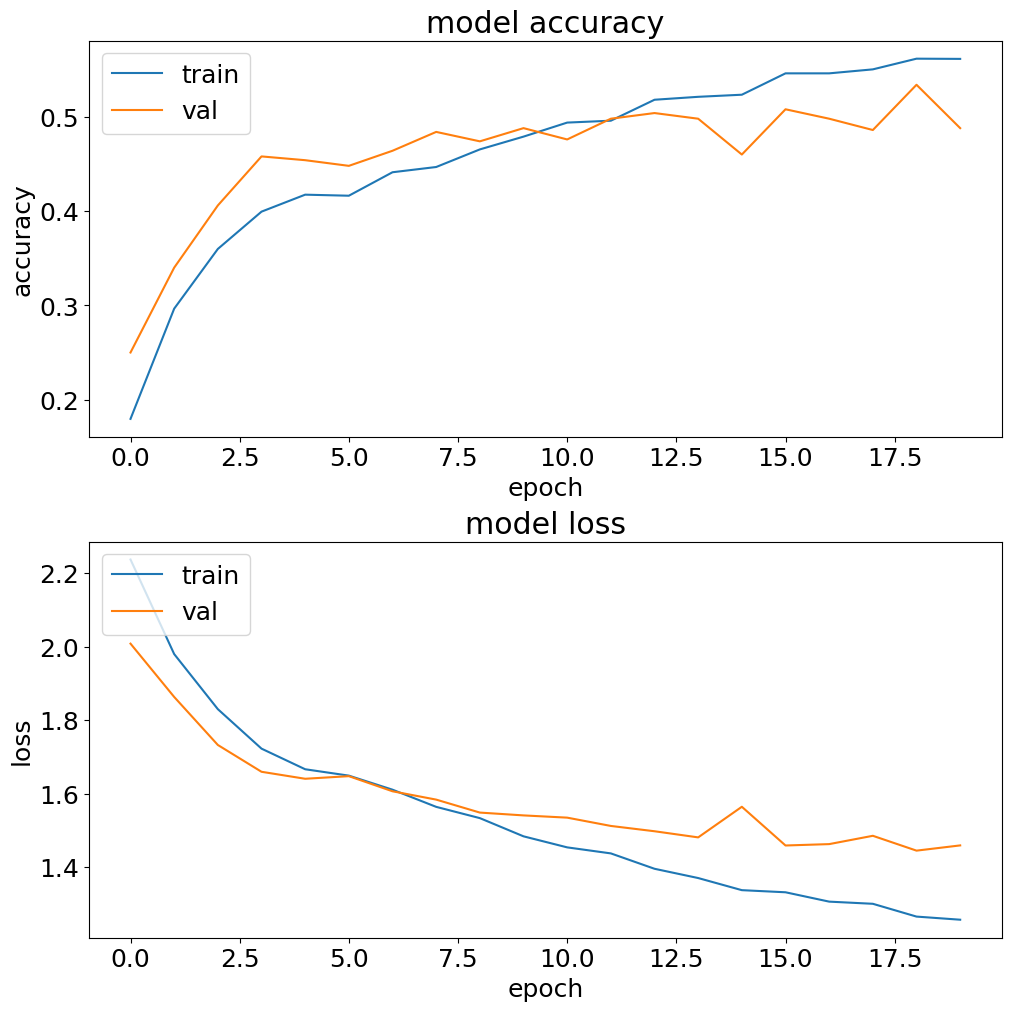

157/157 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       505
           1       0.84      0.64      0.73       460
           2       0.41      0.69      0.52       519
           3       0.49      0.55      0.52       486
           4       0.60      0.35      0.44       519
           5       0.65      0.48      0.55       488
           6       0.69      0.61      0.65       518
           7       0.62      0.67      0.64       486
           8       0.72      0.69      0.71       520
           9       0.68      0.73      0.70       498

    accuracy                           0.61      4999
   macro avg       0.63      0.61      0.61      4999
weighted avg       0.63      0.61      0.61      4999

[[336   6  37  12  12   4   2  16  55  25]
 [ 20 295  10   2   5   5  13   9  33  68]
 [ 32   2 357  30  22  15  22  22   7  10]
 [  6   0  80 267  23  38  33  22   5  12]
 [ 28   2 152

In [9]:
n=5000
x_train = original_x_train[1:n]; y_train=original_y_train[1:n]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))
print("Training Accuracy: {}".format(accuracy_score(y_train1, y_pred))) 

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))
print("Testing Accuracy: {}".format(accuracy_score(y_test1, y_pred)))

In [10]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(x_train, y_train)

baseline_pred = baseline.predict(x_train)
y_baseline_pred = np.argmax(baseline_pred, axis=1);

print(classification_report(y_train1, y_baseline_pred))
print(confusion_matrix(y_train1, y_baseline_pred))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[505   0   0   0   0   0   0   0   0   0]
 [460   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [486   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [488   0   0   0   0   0 

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [15]:
def train_sizes(sizes):
    fig, axes = plt.subplots(4, 2)
    output = []

    for i in range(len(sizes)):

        x_train = original_x_train[1:sizes[i]]; y_train = original_y_train[1:sizes[i]]

        # Scale images to the [0, 1] range
        x_train = x_train.astype("float32") / 255

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)

        model = keras.Sequential()
        model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()

        batch_size = 128
        epochs = 20
        
        start = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        end = time.time()
        
        axes[i, 0].plot(history.history['accuracy'])
        axes[i, 0].plot(history.history['val_accuracy'])
        axes[i, 0].set_title('Model accuracy for training size: {}'.format(sizes[i]))
        axes[i, 0].set(ylabel = 'accuracy', xlabel = 'epoch')
        axes[i, 0].legend(['train', 'val'], loc='upper left')
        
        axes[i, 1].plot(history.history['loss'])
        axes[i, 1].plot(history.history['val_loss'])
        axes[i, 1].set_title('Model loss for Training Size: {}'.format(sizes[i]))
        axes[i, 1].set(ylabel = 'loss', xlabel = 'epoch')
        axes[i, 1].legend(['train', 'val'], loc='upper left')

        preds = model.predict(x_train)
        y_pred = np.argmax(preds, axis=1)
        y_train1 = np.argmax(y_train, axis=1)
        print(classification_report(y_train1, y_pred))
        print(confusion_matrix(y_train1,y_pred))
        training_accuracy = accuracy_score(y_train1, y_pred) 

        preds = model.predict(x_test)
        y_pred = np.argmax(preds, axis=1)
        y_test1 = np.argmax(y_test, axis=1)
        print(classification_report(y_test1, y_pred))
        print(confusion_matrix(y_test1,y_pred))
        testing_accuracy = accuracy_score(y_test1, y_pred)

        output.append({
            'size': sizes[i],
            'training time': end - start,
            'training accuracy': training_accuracy,
            'testing accuracy': testing_accuracy 
        })
    
    plt.show()

    return output

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 10)               

2022-11-16 23:18:47.674816: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 442355712 exceeds 10% of free system memory.


282/282 [==============================] - 41s 143ms/step - loss: 1.8297 - accuracy: 0.3495 - val_loss: 1.5898 - val_accuracy: 0.4457
Epoch 2/20
282/282 [==============================] - 41s 144ms/step - loss: 1.5408 - accuracy: 0.4599 - val_loss: 1.4379 - val_accuracy: 0.5055
Epoch 3/20
282/282 [==============================] - 41s 147ms/step - loss: 1.4293 - accuracy: 0.5021 - val_loss: 1.4239 - val_accuracy: 0.5238
Epoch 4/20
282/282 [==============================] - 40s 143ms/step - loss: 1.3536 - accuracy: 0.5347 - val_loss: 1.3045 - val_accuracy: 0.5537
Epoch 5/20
282/282 [==============================] - 40s 142ms/step - loss: 1.3088 - accuracy: 0.5518 - val_loss: 1.2904 - val_accuracy: 0.5700
Epoch 6/20
282/282 [==============================] - 40s 142ms/step - loss: 1.2737 - accuracy: 0.5681 - val_loss: 1.2515 - val_accuracy: 0.5867
Epoch 7/20
282/282 [==============================] - 41s 145ms/step - loss: 1.2500 - accuracy: 0.5767 - val_loss: 1.2021 - val_accuracy: 0.6

2022-11-16 23:31:50.666480: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 491507712 exceeds 10% of free system memory.


1250/1250 [==============================] - 13s 11ms/step
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      3986
           1       0.71      0.91      0.80      3986
           2       0.70      0.47      0.56      4048
           3       0.57      0.50      0.53      3984
           4       0.61      0.66      0.63      4003
           5       0.63      0.60      0.61      3975
           6       0.75      0.77      0.76      4019
           7       0.72      0.77      0.74      4023
           8       0.84      0.79      0.81      3997
           9       0.80      0.74      0.77      3978

    accuracy                           0.70     39999
   macro avg       0.70      0.70      0.70     39999
weighted avg       0.70      0.70      0.70     39999

[[3141  156   87   40   55   35   18   54  254  146]
 [  82 3644    9   16    7    4   12    9   45  158]
 [ 402   80 1911  271  541  249  258  202   85   49]
 [ 130   92  163 1985  

/home/rxshri99/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


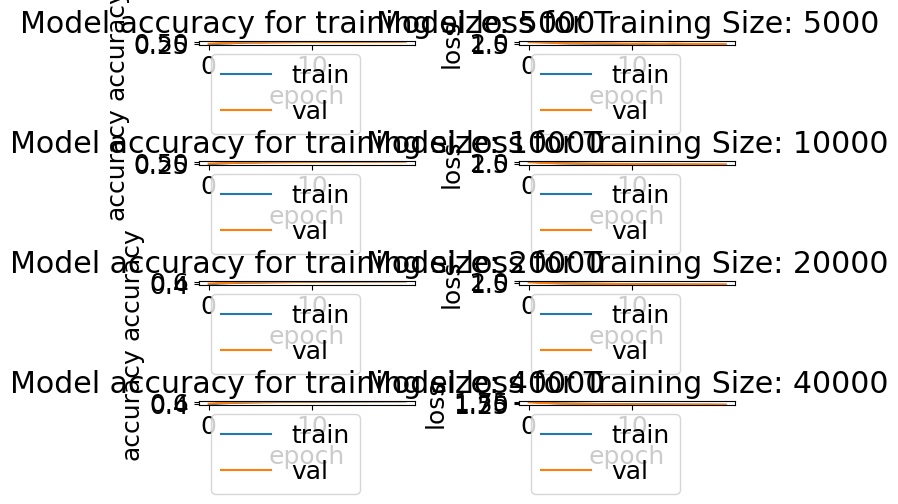

[{'size': 5000, 'training time': 143.1646740436554, 'training accuracy': 0.6437287457491498, 'testing accuracy': 0.5136}, {'size': 10000, 'training time': 207.70244765281677, 'training accuracy': 0.6711671167116712, 'testing accuracy': 0.5669}, {'size': 20000, 'training time': 414.49880623817444, 'training accuracy': 0.7026351317565879, 'testing accuracy': 0.6286}, {'size': 40000, 'training time': 783.0133063793182, 'training accuracy': 0.7009425235630891, 'testing accuracy': 0.6566}]


In [16]:
sizes = [5000, 10000, 20000, 40000]
result = train_sizes(sizes)
print(result)

In [23]:
def different_l1(l1_arr):
    fig, axes = plt.subplots(7, 2)
    output = []

    for i in range(len(l1_arr)):
        model = keras.Sequential()
        model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(l1_arr[i])))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()

        batch_size = 128
        epochs = 20
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        
        axes[i, 0].plot(history.history['accuracy'])
        axes[i, 0].plot(history.history['val_accuracy'])
        axes[i, 0].set_title('Model accuracy for L1 Weight: {}'.format(l1_arr[i]))
        axes[i, 0].set(ylabel = 'accuracy', xlabel = 'epoch')
        axes[i, 0].legend(['train', 'val'], loc='upper left')
        
        axes[i, 1].plot(history.history['loss'])
        axes[i, 1].plot(history.history['val_loss'])
        axes[i, 1].set_title('Model loss for L1 Weight: {}'.format(l1_arr[i]))
        axes[i, 1].set(ylabel = 'loss', xlabel = 'epoch')
        axes[i, 1].legend(['train', 'val'], loc='upper left')

        preds = model.predict(x_train)
        y_pred = np.argmax(preds, axis=1)
        y_train1 = np.argmax(y_train, axis=1)
        print(classification_report(y_train1, y_pred))
        print(confusion_matrix(y_train1,y_pred))
        training_accuracy = accuracy_score(y_train1, y_pred) 

        preds = model.predict(x_test)
        y_pred = np.argmax(preds, axis=1)
        y_test1 = np.argmax(y_test, axis=1)
        print(classification_report(y_test1, y_pred))
        print(confusion_matrix(y_test1,y_pred))
        testing_accuracy = accuracy_score(y_test1, y_pred)

        output.append({
            'L1 Weight': l1_arr[i],
            'training accuracy': training_accuracy,
            'testing accuracy': testing_accuracy 
        })
    
    plt.show()

    return output

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_79 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_80 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_81 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_17 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_17 (Flatten)        (None, 2048)              0         
                                                                 
 dense_17 (Dense)            (None, 10)              

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Epoch 1/20
36/36 [==============================] - 5s 133ms/step - loss: 2849.0896 - accuracy: 0.1169 - val_loss: 751.4435 - val_accuracy: 0.1400
Epoch 2/20
36/36 [==============================] - 4s 124ms/step - loss: 250.1665 - accuracy: 0.1194 - val_loss: 66.5745 - val_accuracy: 0.1160
Epoch 3/20
36/36 [==============================] - 4s 124ms/step - loss: 39.6866 - accuracy: 0.1054 - val_loss: 29.1920 - val_accuracy: 0.1040
Epoch 4/20
36/36 [==============================] - 5s 126ms/step - loss: 27.9119 - accuracy: 0.1049 - val_loss: 27.6321 - val_accuracy: 0.1040
Epoch 5/20
36/36 [==============================] - 4s 123ms/step - loss: 27.1290 - accuracy: 0.1058 - val_loss: 27.0085 - val_accuracy: 0.1040
Epoch 6/20
36/36 [==============================] - 5s 135ms/step - loss: 26.7979 - accuracy: 0.1051 - val_loss: 26.6658 - val_accuracy: 0.1040
Epoch 7/20
36/36 [==============================] - 4s 123ms/step - loss: 26.5058 - accuracy: 0.1100 - val_loss: 26.3761 - val_accur

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Epoch 1/20
36/36 [==============================] - 5s 129ms/step - loss: 28709.5039 - accuracy: 0.1209 - val_loss: 7689.4570 - val_accuracy: 0.1520
Epoch 2/20
36/36 [==============================] - 4s 124ms/step - loss: 2519.9670 - accuracy: 0.1134 - val_loss: 653.9343 - val_accuracy: 0.0900
Epoch 3/20
36/36 [==============================] - 4s 121ms/step - loss: 377.5081 - accuracy: 0.1085 - val_loss: 269.1868 - val_accuracy: 0.1040
Epoch 4/20
36/36 [==============================] - 4s 122ms/step - loss: 258.5111 - accuracy: 0.1071 - val_loss: 257.1173 - val_accuracy: 0.0920
Epoch 5/20
36/36 [==============================] - 4s 121ms/step - loss: 252.9386 - accuracy: 0.1054 - val_loss: 252.3054 - val_accuracy: 0.1040
Epoch 6/20
36/36 [==============================] - 4s 121ms/step - loss: 252.2158 - accuracy: 0.1076 - val_loss: 251.3786 - val_accuracy: 0.1040
Epoch 7/20
36/36 [==============================] - 4s 125ms/step - loss: 251.5560 - accuracy: 0.1056 - val_loss: 251.56

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.09      0.16      0.11      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.84      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.03     10000
weighted avg       0.02      0.10      0.03     10000

[[  0   0  68   0 932   0   0   0   0   0]
 [  0   0 181   0 819   0   0   0   0   0]
 [  0   0 160   0 840   0   0   0   0   0]
 [  0   0 309   0 691   0   0   0   0   0]
 [  0   0 163

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

                                                                 
 dropout_23 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_23 (Flatten)        (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 10)                20490     
                                                                 
Total params: 37,146
Trainable params: 37,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
36/36 [==============================] - 6s 131ms/step - loss: 284904.7500 - accuracy: 0.1067 - val_loss: 75718.8984 - val_accuracy: 0.1440
Epoch 2/20
36/36 [==============================] - 4s 124ms/step - loss: 24900.8301 - accuracy: 0.1211 - val_loss: 6481.0811 - val_accuracy: 0.1400
Epoch 3/20
36/36 [==============================] - 4s 122ms/step - loss: 3769.2915 - accuracy: 0.1056

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0 1000    0    0

/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rxshri99/anaconda3/envs/all/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

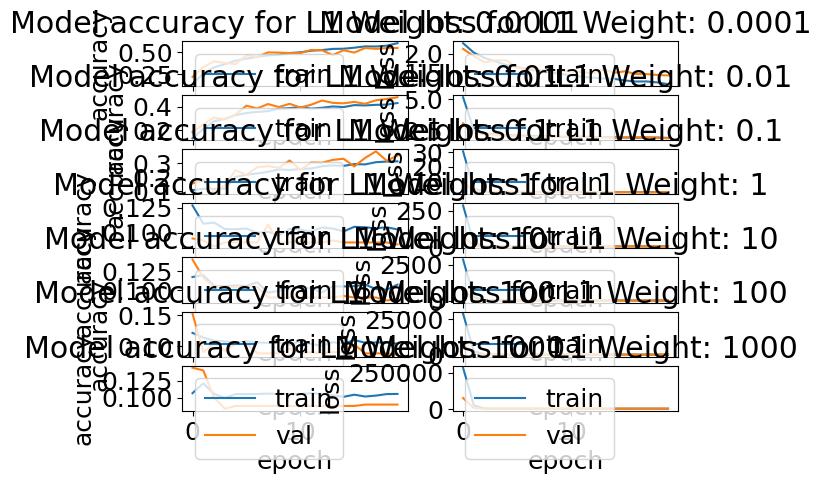

[{'L1 Weight': 0.0001, 'training accuracy': 0.6659331866373275, 'testing accuracy': 0.5121}, {'L1 Weight': 0.01, 'training accuracy': 0.4966993398679736, 'testing accuracy': 0.4453}, {'L1 Weight': 0.1, 'training accuracy': 0.3424684936987398, 'testing accuracy': 0.3364}, {'L1 Weight': 1, 'training accuracy': 0.10382076415283056, 'testing accuracy': 0.1}, {'L1 Weight': 10, 'training accuracy': 0.10382076415283056, 'testing accuracy': 0.1}, {'L1 Weight': 100, 'training accuracy': 0.10102020404080816, 'testing accuracy': 0.0997}, {'L1 Weight': 1000, 'training accuracy': 0.10382076415283056, 'testing accuracy': 0.1}]


In [24]:
l1_weights = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
result = different_l1(l1_weights)
print(result)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                 

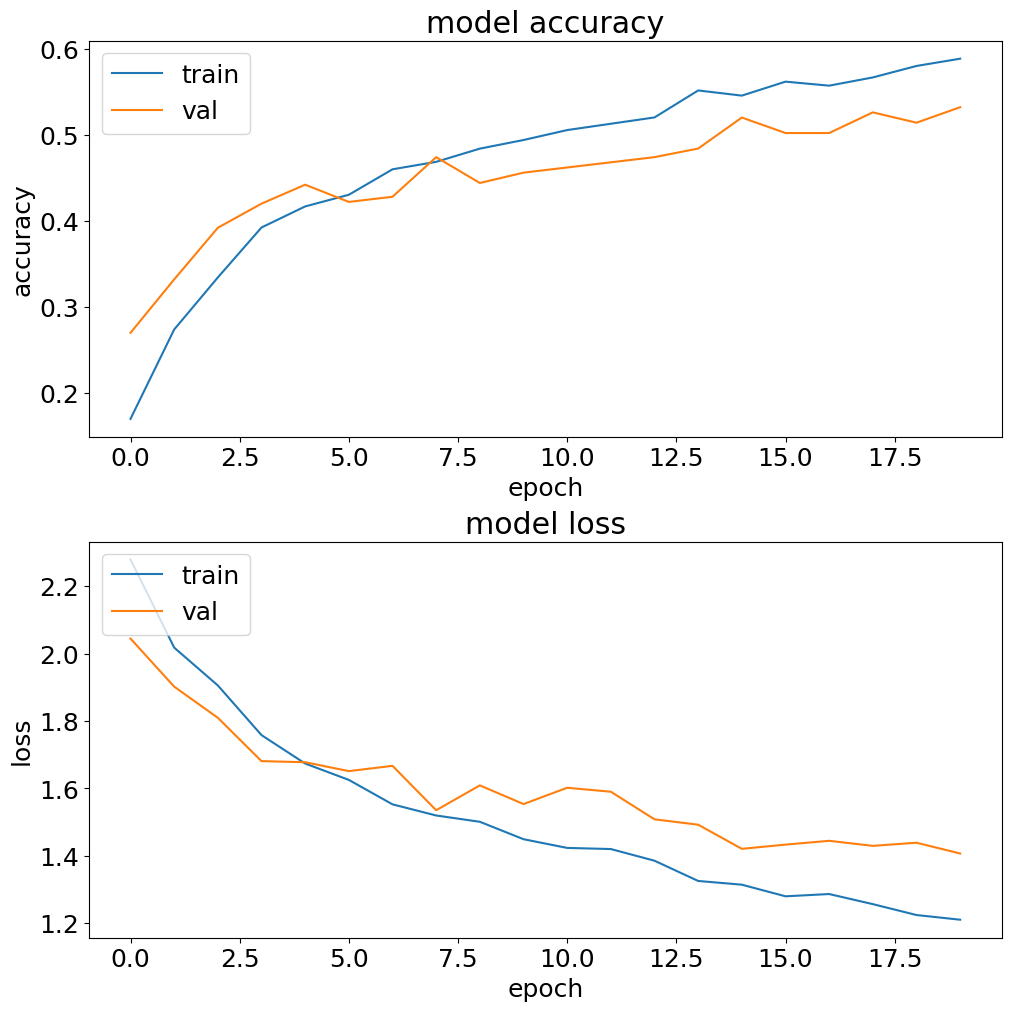

157/157 [==============================] - 3s 18ms/step
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       505
           1       0.75      0.73      0.74       460
           2       0.49      0.62      0.55       519
           3       0.60      0.41      0.48       486
           4       0.61      0.53      0.57       519
           5       0.59      0.57      0.58       488
           6       0.74      0.65      0.69       518
           7       0.68      0.68      0.68       486
           8       0.62      0.77      0.69       520
           9       0.74      0.68      0.71       498

    accuracy                           0.63      4999
   macro avg       0.64      0.63      0.63      4999
weighted avg       0.64      0.63      0.63      4999

[[357  12  19   5   8   1   0   8  84  11]
 [ 17 337   3   0   2   1  10   3  47  40]
 [ 46   2 323  16  34  26  20  19  23  10]
 [ 13   7  52 197  28  85  41  30  13  20]
 [ 30   6 100

In [19]:
def max_polling():
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    
    start = time.time();
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    end = time.time()
    print('Time Taken: {}'.format(end-start))

    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))
    print("Training Accuracy: {}".format(accuracy_score(y_train1, y_pred))) 

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))
    print("Testing Accuracy: {}".format(accuracy_score(y_test1, y_pred)))

max_polling()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_52 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 32)        

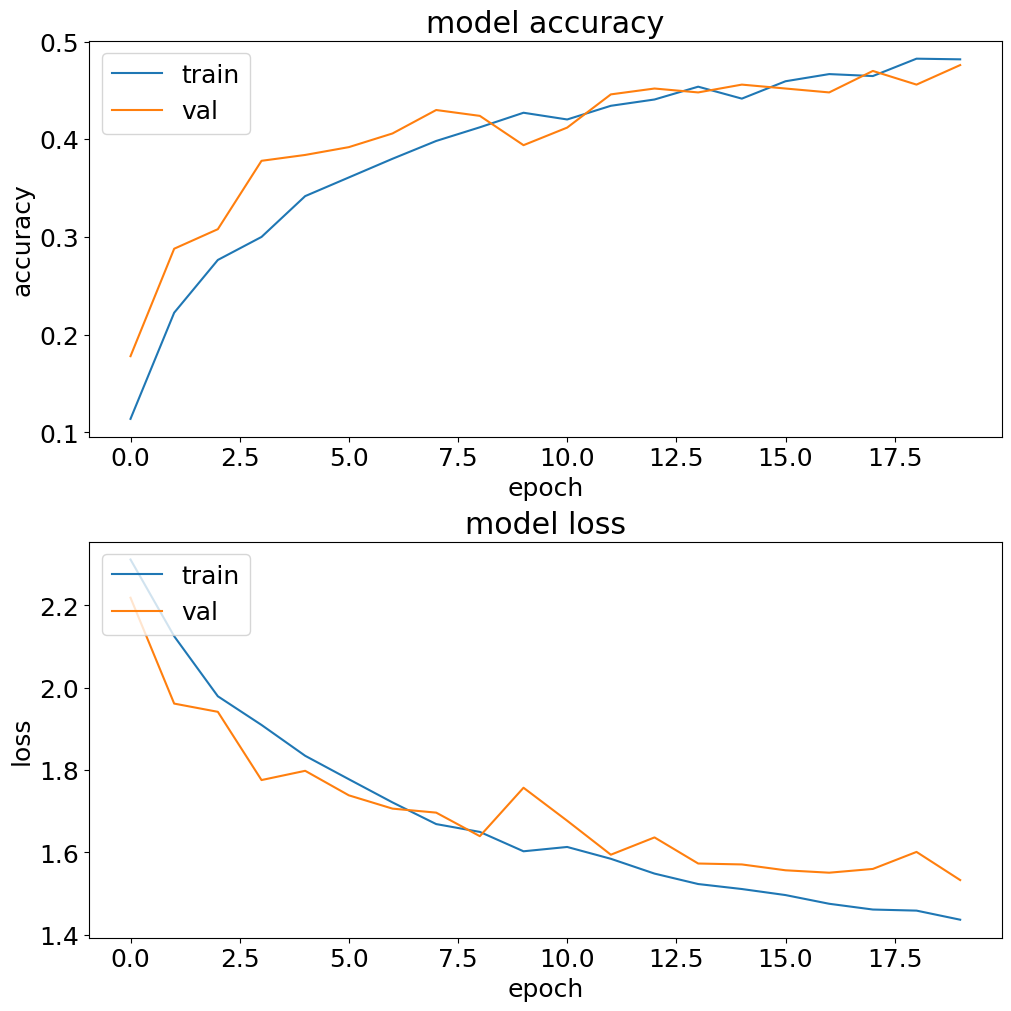

157/157 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       505
           1       0.55      0.67      0.61       460
           2       0.47      0.40      0.43       519
           3       0.39      0.40      0.40       486
           4       0.56      0.27      0.36       519
           5       0.43      0.57      0.49       488
           6       0.63      0.47      0.54       518
           7       0.54      0.57      0.56       486
           8       0.56      0.68      0.61       520
           9       0.65      0.57      0.61       498

    accuracy                           0.52      4999
   macro avg       0.53      0.52      0.51      4999
weighted avg       0.53      0.52      0.51      4999

[[302  29  17   2   5   6   3  16 117   8]
 [ 26 309   0   4   1   8   6   8  45  53]
 [ 49  14 209  35  40  77  31  40  18   6]
 [ 15  18  31 195   6 125  26  31  19  20]
 [ 55  11  83

In [20]:
def upsampling():
    model = keras.Sequential()
    model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(8, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))
    print("Training Accuracy: {}".format(accuracy_score(y_train1, y_pred))) 

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))
    print("Testing Accuracy: {}".format(accuracy_score(y_test1, y_pred)))

upsampling()

In [21]:
def train_sizes_upsampling(sizes):
    fig, axes = plt.subplots(4, 2)
    output = []

    for i in range(len(sizes)):

        x_train = original_x_train[1:sizes[i]]; y_train = original_y_train[1:sizes[i]]

        # Scale images to the [0, 1] range
        x_train = x_train.astype("float32") / 255

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)

        model = keras.Sequential()
        model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        model.add(Conv2D(8, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()

        batch_size = 128
        epochs = 20
        
        start = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        end = time.time()
        
        axes[i, 0].plot(history.history['accuracy'])
        axes[i, 0].plot(history.history['val_accuracy'])
        axes[i, 0].set_title('Model accuracy for training size: {}'.format(sizes[i]))
        axes[i, 0].set(ylabel = 'accuracy', xlabel = 'epoch')
        axes[i, 0].legend(['train', 'val'], loc='upper left')
        
        axes[i, 1].plot(history.history['loss'])
        axes[i, 1].plot(history.history['val_loss'])
        axes[i, 1].set_title('Model loss for Training Size: {}'.format(sizes[i]))
        axes[i, 1].set(ylabel = 'loss', xlabel = 'epoch')
        axes[i, 1].legend(['train', 'val'], loc='upper left')

        preds = model.predict(x_train)
        y_pred = np.argmax(preds, axis=1)
        y_train1 = np.argmax(y_train, axis=1)
        print(classification_report(y_train1, y_pred))
        print(confusion_matrix(y_train1,y_pred))
        training_accuracy = accuracy_score(y_train1, y_pred) 

        preds = model.predict(x_test)
        y_pred = np.argmax(preds, axis=1)
        y_test1 = np.argmax(y_test, axis=1)
        print(classification_report(y_test1, y_pred))
        print(confusion_matrix(y_test1,y_pred))
        testing_accuracy = accuracy_score(y_test1, y_pred)

        output.append({
            'size': sizes[i],
            'training time': end - start,
            'training accuracy': training_accuracy,
            'testing accuracy': testing_accuracy 
        })
    
    plt.show()

    return output

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 conv2d_56 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_57 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_58 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_59 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_13 (Dropout)        (None, 4, 4, 32)        

2022-11-16 23:54:56.083319: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 442355712 exceeds 10% of free system memory.


282/282 [==============================] - 29s 100ms/step - loss: 1.9366 - accuracy: 0.2883 - val_loss: 1.6798 - val_accuracy: 0.3840
Epoch 2/20
282/282 [==============================] - 29s 105ms/step - loss: 1.6347 - accuracy: 0.4090 - val_loss: 1.5276 - val_accuracy: 0.4577
Epoch 3/20
282/282 [==============================] - 22s 78ms/step - loss: 1.5304 - accuracy: 0.4524 - val_loss: 1.4387 - val_accuracy: 0.4863
Epoch 4/20
282/282 [==============================] - 20s 70ms/step - loss: 1.4627 - accuracy: 0.4761 - val_loss: 1.3918 - val_accuracy: 0.5182
Epoch 5/20
282/282 [==============================] - 20s 71ms/step - loss: 1.4157 - accuracy: 0.4999 - val_loss: 1.3843 - val_accuracy: 0.5203
Epoch 6/20
282/282 [==============================] - 20s 71ms/step - loss: 1.3769 - accuracy: 0.5152 - val_loss: 1.3171 - val_accuracy: 0.5435
Epoch 7/20
282/282 [==============================] - 20s 72ms/step - loss: 1.3399 - accuracy: 0.5280 - val_loss: 1.2683 - val_accuracy: 0.5673
E

/home/rxshri99/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


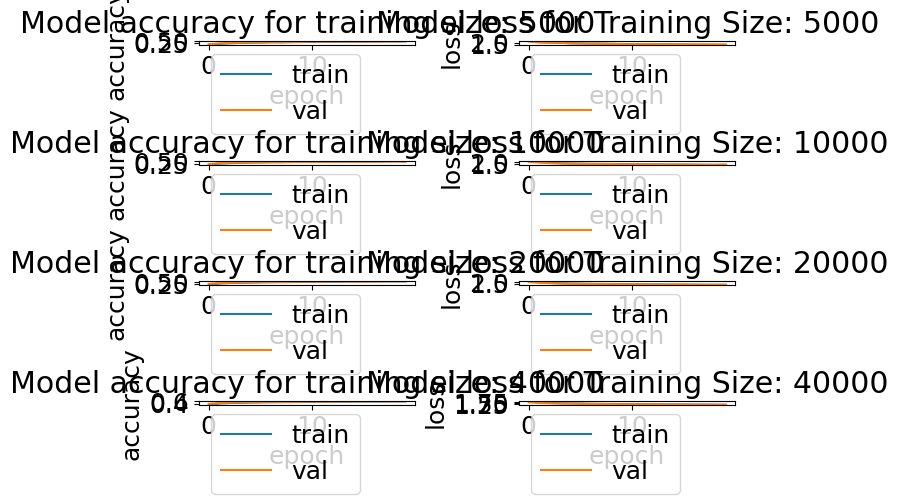

[{'size': 5000, 'training time': 73.53482627868652, 'training accuracy': 0.5169033806761353, 'testing accuracy': 0.4447}, {'size': 10000, 'training time': 145.0504219532013, 'training accuracy': 0.5346534653465347, 'testing accuracy': 0.4779}, {'size': 20000, 'training time': 288.20030641555786, 'training accuracy': 0.6358317915895795, 'testing accuracy': 0.587}, {'size': 40000, 'training time': 425.69870710372925, 'training accuracy': 0.6590914772869322, 'testing accuracy': 0.6219}]


In [22]:
sizes = [5000, 10000, 20000, 40000]
result = train_sizes_upsampling(sizes)
print(result)